In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = "train.csv"
titanic = pd.read_csv(data)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info() # indicates we have missing values in 3 columns. 891 rows and 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe() # summary statistics for numerical columns 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
missing_values = titanic.isnull().sum() # Age - 177 missing values, Cabin - 687 missing values, Embarked - 2 missing values
missing_values[missing_values > 0] # displays columns with missing values 

Age         177
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Handling missing values 

# dropping the "Cabin" column

titanic = titanic.drop(columns=["Cabin"])

# dropping rows where "Embarked" is missing

titanic = titanic.dropna(subset=["Embarked"])

In [ ]:
# fill missing Age values with the median

titanic["Age"].fillna(titanic["Age"].median(), inplace=True)

In [ ]:
# looking at survival rate by gender 

titanic.groupby("Sex")[["Survived"]].mean() # 3 out every 4 females survived, 1 out of every 5 males survived

,Survived
Sex,
female,0.740385
male,0.188908


In [ ]:
# shows how class and gender affected the survival rate 

titanic.groupby(["Sex", "Pclass"])["Survived"].aggregate("mean").unstack()

Pclass,1,2,3
Sex,,,
female,0.967391,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
# The pivot table which was introduced for convinence can handle the multidimensional aggregation as seen above 

# The sex and the classes are actually good predictors of survival 
titanic.pivot_table("Survived", index="Sex", columns="Pclass") # makes the code a lot easier to read 

Pclass,1,2,3
Sex,,,
female,0.967391,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
# Multilevel pivot tables:
# Using the Age variable as a third dimension:

age = pd.cut(titanic["Age"], [0, 18, 80]) # bining the Age variable into 3 categories
titanic.pivot_table("Survived", ["Sex", age], "Pclass")

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.975309  0.903226  0.495050
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.350427  0.086022  0.121622

In [ ]:
fare = pd.qcut(titanic["Fare"], 2)
titanic.pivot_table("Survived", ["Sex", age, "Embarked"], "Pclass")

Pclass                           1         2         3
Sex    Age      Embarked                              
female (0, 18]  C         1.000000  1.000000  0.692308
                Q              NaN       NaN  0.750000
                S         0.857143  1.000000  0.384615
       (18, 80] C         0.974359  1.000000  0.600000
                Q         1.000000  1.000000  0.724138
                S         0.975610  0.892857  0.370968
male   (0, 18]  C         0.500000  1.000000  0.400000
                Q              NaN       NaN  0.000000
                S         1.000000  0.571429  0.214286
       (18, 80] C         0.400000  0.111111  0.210526
                Q         0.000000  0.000000  0.085714
                S         0.328947  0.084337  0.112108

In [ ]:
titanic["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [ ]:
titanic.groupby("Embarked")[["Survived"]].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
titanic.pivot_table("Survived", index="Embarked", columns="Pclass")

Pclass,1,2,3
Embarked,,,
C,0.694118,0.529412,0.378788
Q,0.500000,0.666667,0.375000
S,0.582677,0.463415,0.189802


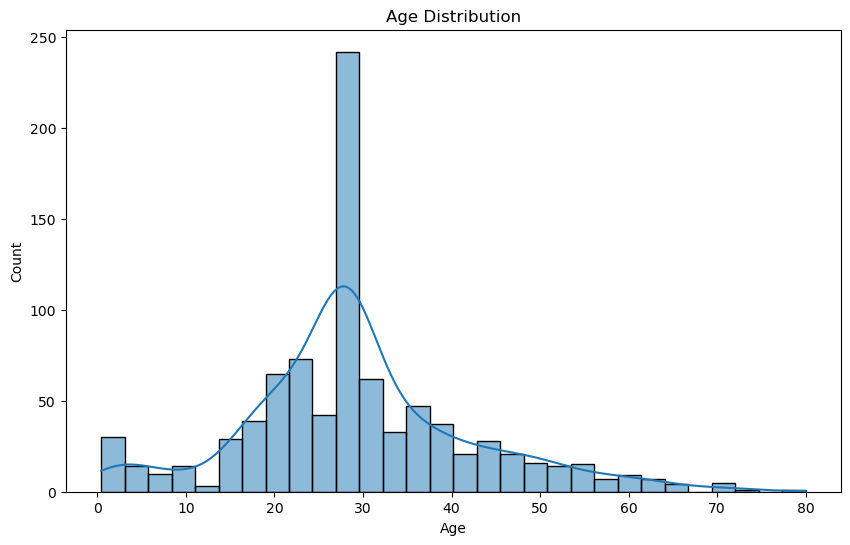

In [ ]:
# Understanding the distribution of individual features and how they relate to the target variable 

# Analyzing Numerical features:

# Age: Age is an important factor as certain age groups (like children) may have been prioritized for survival 

# Plotting the Age distribution:

plt.figure(figsize=(10, 6))
sns.histplot(titanic["Age"], bins=30, kde=True) # kde overlays a smooth curve that helps to see the overall shape
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show() # has a normal distribution

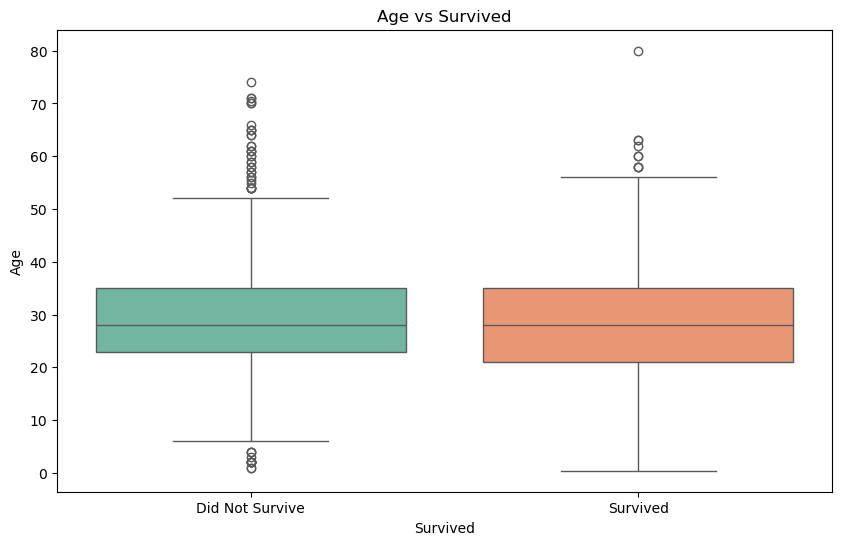

In [ ]:
# Boxplot to visualize the relationship between Age and Survived: there is likely to be more correlation with lesser age and survival

plt.figure(figsize=(10, 6))
sns.boxplot(x="Survived", y="Age", data=titanic, palette="Set2")
plt.title("Age vs Survived")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.show()

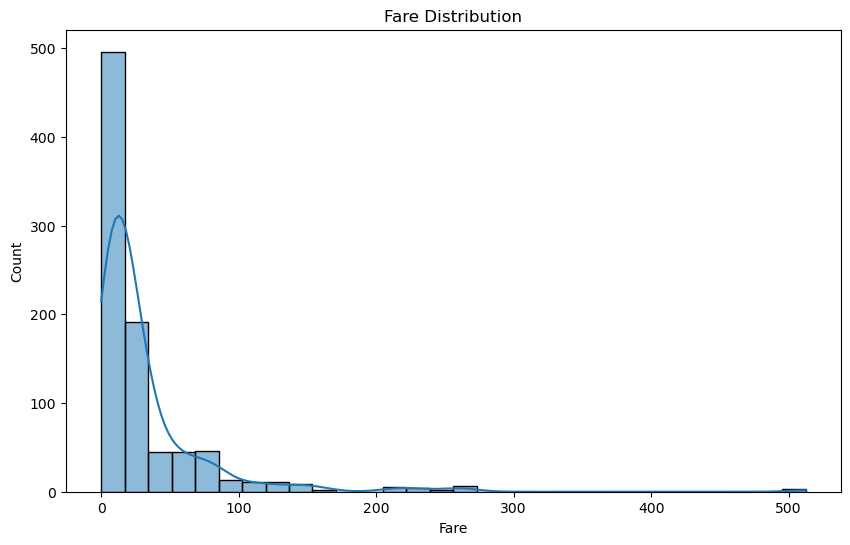

In [ ]:
# Fare: Higher prices could indicate wealthier passengers who may have had higher chances of survival

# Plotting the distribution for Fare:

plt.figure(figsize=(10, 6))
sns.histplot(titanic["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show() # has a right-skewed distribution since most passengers likely paid lower fares, with fewer high-paying outliers

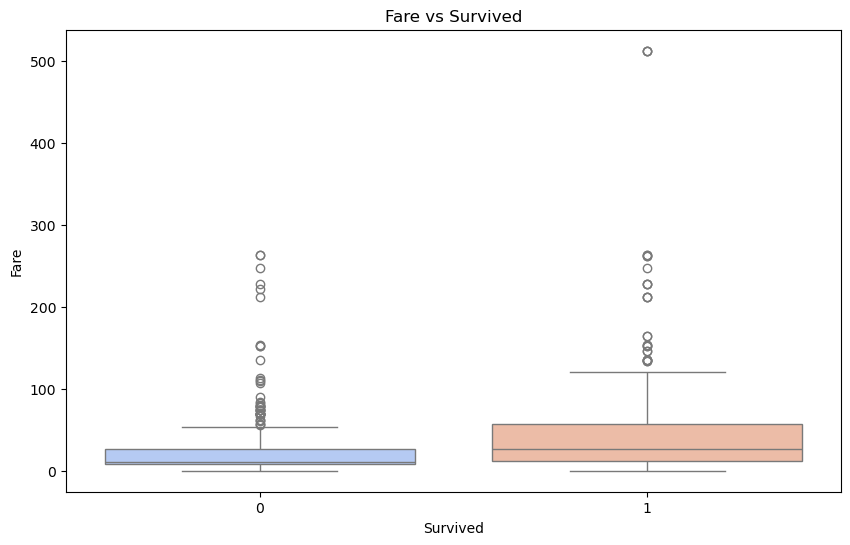

In [ ]:
# Boxplot for Fare and Survival: passengers with higher Fare prices has more chances of survival

plt.figure(figsize=(10, 6))
sns.boxplot(x="Survived", y="Fare", data=titanic, palette="coolwarm")
plt.title("Fare vs Survived")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

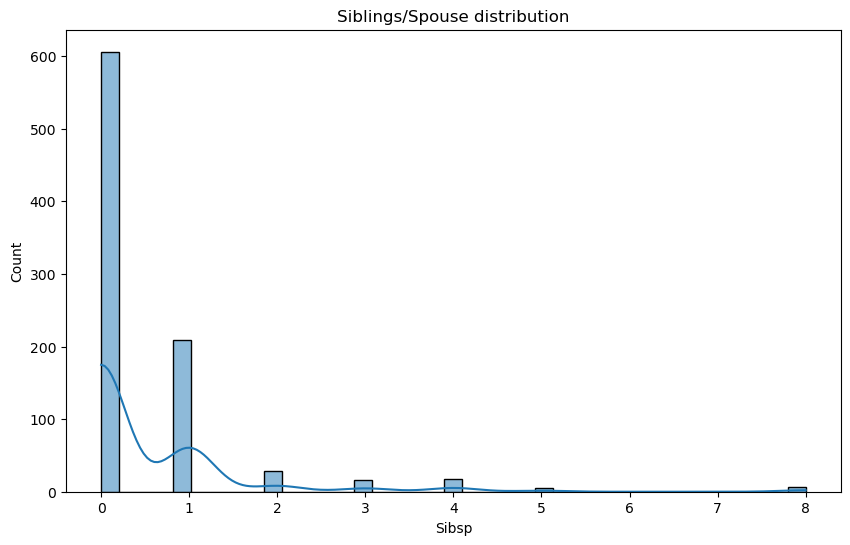

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic["SibSp"], kde=True)
plt.title("Siblings/Spouse distribution")
plt.xlabel("Sibsp")
plt.show()

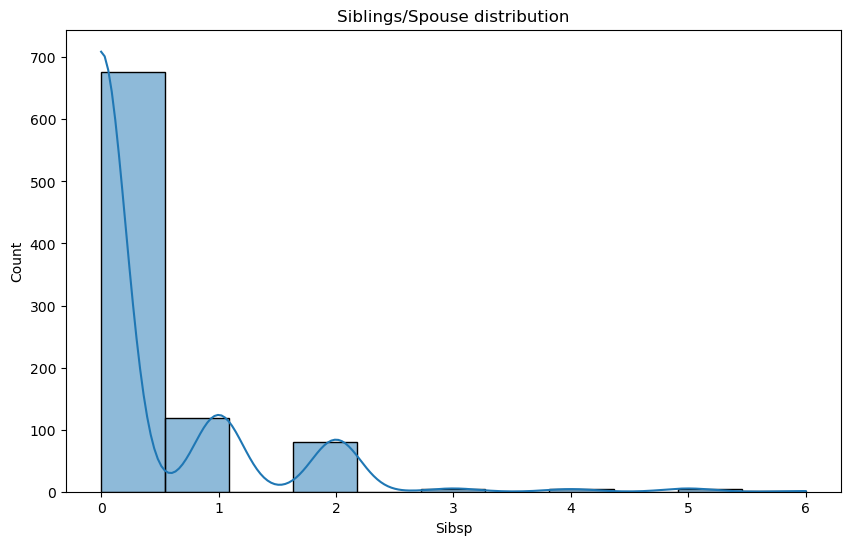

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic["Parch"], kde=True)
plt.title("Siblings/Spouse distribution")
plt.xlabel("Sibsp")
plt.show()

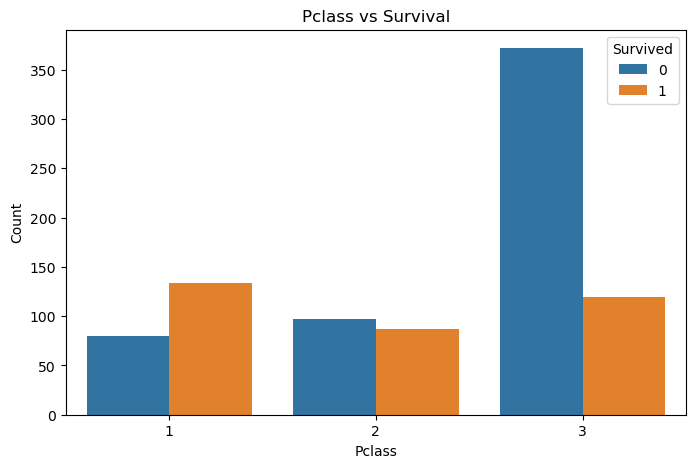

In [ ]:
# Analyzing Categorical Features: Pclass, Sex, Embarked

# Pclass: Passenger's class can indicate social status, which may correlate with survival rates

# Countplot for Pclass: Plots the survival rate for each class

# A countplot displays the count of survivors and non-survivors within each class, 
# making it easy to see how survival varied across classes.

plt.figure(figsize=(8, 5))
sns.countplot(x="Pclass", hue="Survived", data=titanic)
plt.title("Pclass vs Survival")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show() # a cool viz!. Indicates that the Pclass feature is a good predictor for survival tendencies.
# socio-economic status influenced survival

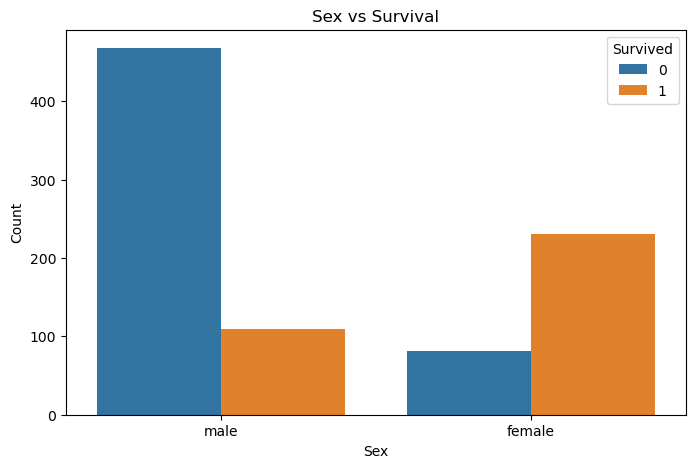

In [ ]:
# Sex: Gender may have affected survival as due to the "women and children first" policy

# Plotting survival rates by gender:

plt.figure(figsize=(8, 5))
sns.countplot(x="Sex", hue="Survived", data=titanic)
plt.title("Sex vs Survival")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show() # the female had more survival tendencies than men

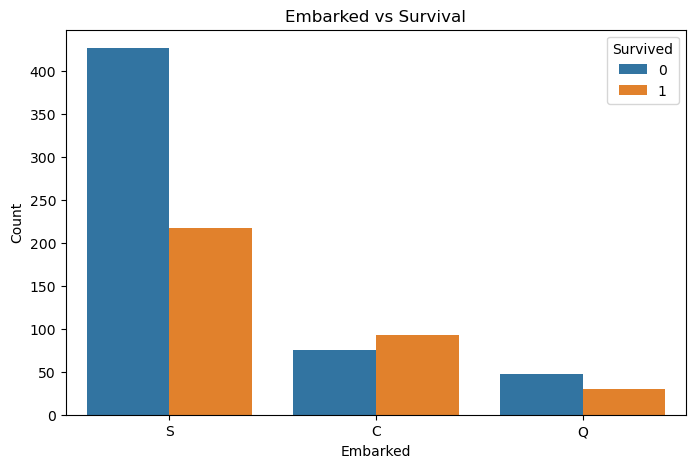

In [ ]:
# Embarked: The port of embarkation could influence survival, as different ports had different type of passengers

# Countplot for Embarkation:

plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked", hue="Survived", data=titanic)
plt.title("Embarked vs Survival")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

### Feature Engineering

In [ ]:
# Creating new features:

# Creating an Age Group feature:

# define Age categories:

# The labels will allow for the analysis of survival by age category 
titanic["AgeGroup"] = pd.cut(titanic["Age"], bins=[0, 12, 18, 60, 100], labels=["Child", "Teen", "Adult", "Senior"])

In [ ]:
#  Family size, derived from SibSp (siblings/spouses) and Parch (parents/children), might indicate whether traveling in
# groups influenced survival.

# Creating a Family Size feature:

titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1 # plus 1 for the passenger 

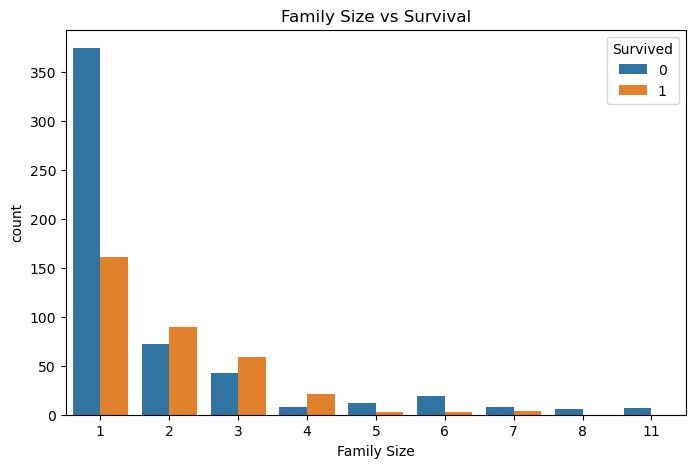

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="FamilySize", hue="Survived", data=titanic)
plt.title("Family Size vs Survival")
plt.xlabel("Family Size")
plt.legend(title="Survived")
plt.show()

In [ ]:
# Traveling alone versus with a group could have impacted survival chances, so it’s useful to flag passengers who had no 
# family with them.

# Creating Alone feature:

titanic["Alone"] = (titanic["FamilySize"] == 1).astype(int) # .astype(int) converts the result to integer value (0 or 1 )

### Encoding Categorical Variables 

In [ ]:
# Encoding Sex feature:

titanic["Sex"] = titanic["Sex"].map({"male": 0, "female": 1}) # the will help the model to recognize gender differences numerically

In [ ]:
# Encoding AgeGroup and Embarked:

# AgeGroup and Embarked are multi-class categorical variables, so we’ll use one-hot encoding to convert each category 
# into its own binary column.

titanic = pd.get_dummies(titanic, columns=["AgeGroup", "Embarked"], drop_first=True, dtype=int)
# pd.get_dummies converts each category into a new column
# drop_first=True removes one category to avoid multicolinearity (a redundancy issue where categories are perfectly correlated).

### Scaling Numerical Features

In [ ]:
# Scaling Fare:

# Fare has a wide range of values. Scaling it helps to bring it to a comparable range with other features.

from sklearn.preprocessing import StandardScaler

# Initializing the scaler:
scaler = StandardScaler() # normalizes the data to have a mean of 0 and std of 1, which helps the model to interpret 
# values consistently 

# Scaling the Fare feature:
titanic["Fare"] = scaler.fit_transform(titanic[["Fare"]]) # fit_transform learns and applys the scaling directly to Fare 

In [ ]:
# Final check for missing values:

titanic.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
FamilySize         0
Alone              0
AgeGroup_Teen      0
AgeGroup_Adult     0
AgeGroup_Senior    0
Embarked_Q         0
Embarked_S         0
dtype: int64

In [ ]:
# Feature Type Refinement:

titanic.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Sex                  int64
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
FamilySize           int64
Alone                int32
AgeGroup_Teen        int32
AgeGroup_Adult       int32
AgeGroup_Senior      int32
Embarked_Q           int32
Embarked_S           int32
dtype: object

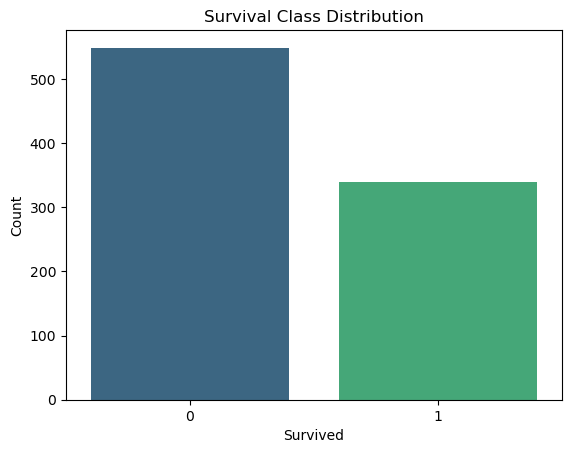

In [ ]:
# Addressing Class Imbalance:

# Visualizing the Class Distribution:

sns.countplot(x="Survived", data=titanic, palette="viridis")
plt.title("Survival Class Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

#### Handling the Name feature

In [ ]:
# Extracting Titles from Name: This might help to reveal useful insights about social standing, age or even gender 

# We can extract titles (e.g., Mr, Mrs, Miss, Master) and use them as a new categorical feature 

titanic["Title"] = titanic["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

In [ ]:
titanic["Title"].value_counts()

Title
Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
# Grouping rare titles: Reducing unique values simplifies the model’s task, especially if some titles only appear a few times in the dataset.

# Simplifying rare titles:

titanic["Title"] = titanic["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
titanic["Title"] = titanic["Title"].replace(["Mlle", "Ms"], "Miss")
titanic["Title"] = titanic["Title"].replace("Mme", "Mrs")

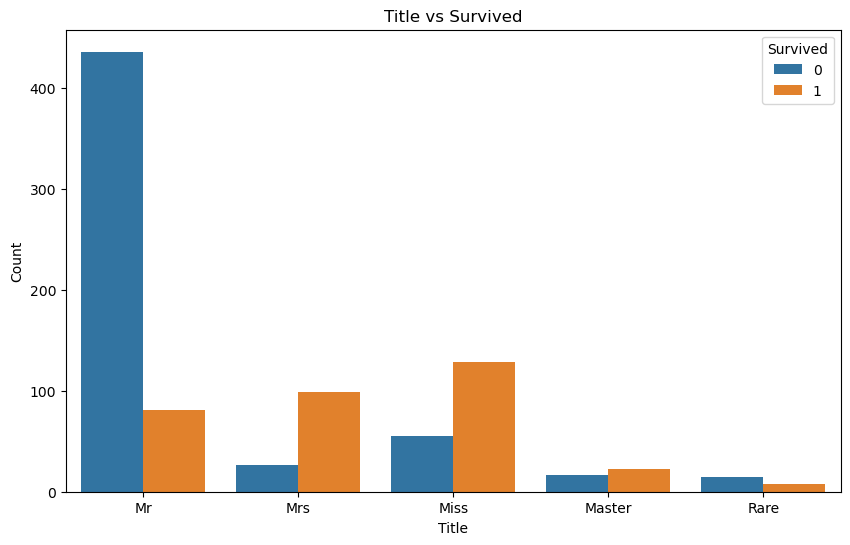

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Title", hue="Survived", data=titanic)
plt.title("Title vs Survived")
plt.xlabel("Title")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

In [ ]:
# Encoding Title as Categorical Feature:

# One-hot encode Title feature:

titanic = pd.get_dummies(titanic, columns=["Title"], drop_first=True, dtype=int)

In [ ]:
# Dropping the original Name and Ticket columns:

titanic = titanic.drop(["Name", "Ticket"], axis=1)

In [ ]:
titanic.head() # we are left with numerical categorical variables

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Alone,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,0,22.0,1,0,-0.500240,2,0,0,1,0,0,1,0,1,0,0
1,2,1,1,1,38.0,1,0,0.788947,2,0,0,1,0,0,0,0,0,1,0
2,3,1,3,1,26.0,0,0,-0.486650,1,1,0,1,0,0,1,1,0,0,0
3,4,1,1,1,35.0,1,0,0.422861,2,0,0,1,0,0,1,0,0,1,0
4,5,0,3,0,35.0,0,0,-0.484133,1,1,0,1,0,0,1,0,1,0,0


### Splitting the data

In [ ]:
# Define features (X) and target (y)

X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

In [ ]:
# Splitting into training and test sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training 

In [ ]:
# Model Training with Logistic Regrssion:

#  A common choice for binary classification problems. It calculates probabilities and can work well with fewer features.

from sklearn.linear_model import LogisticRegression

# Initializing the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

In [ ]:
# Fitting the model to the training data:

# Fitting (or training) the model allows it to learn patterns in the training data. The fit method updates the model’s parameters to minimize
# errors in predicting the target variable (Survived).

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Evaluating the Model

In [ ]:
# Making Predictions:

# Generate predictions on the test set

y_pred = log_reg.predict(X_test)

In [ ]:
# Evaluating with Accuracy Score:

from sklearn.metrics import accuracy_score

# Calculating Accuracy:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%") 

Accuracy: 79.78%


In [ ]:
# Evaluating with Classification Report:

# A classification report provides a deeper look, including precision, recall, and f1-score for each class, 
# helping us understand performance beyond accuracy.

from sklearn.metrics import classification_report

# Print classification report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       109
           1       0.73      0.75      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



### Testing Alternative Models

In [ ]:
# Implementing and Evaluating Each Model:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Looping through each model, training it, and checking its accuracy on the test set:

# Dictionary of models:

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42), 
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

In [ ]:
models.items()

dict_items([('Decision Tree', DecisionTreeClassifier(random_state=42)), ('Random Forest', RandomForestClassifier(random_state=42)), ('Support Vector Machine', SVC(random_state=42))])

In [ ]:
# Evaluating each model:

for model_name, model in models.items():
    # Train the model:
    model.fit(X_train, y_train)

    # Make predictions:
    y_pred = model.predict(X_test)

    # Calculate accuracy:
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

Decision Tree Accuracy: 75.28%
Random Forest Accuracy: 80.34%
Support Vector Machine Accuracy: 61.24%


In [ ]:
print("Test set score: {:.2f}".format(log_reg.score(X_test, y_test))) # just checking...

Test set score: 0.80


### Hyperparameter Tuning for Logistic Regression

In [ ]:
# Using Grid Search for Hyperparmeter tuning: Grid Search is a method to exhaustively search over a set of specified hyperparameters to find the 
# best combination

# C - Controls regularization strength. Lower values mean stronger regularization strength.
# solver - Determines the optimization algorithm. Different solvers can have an impact on performance.
# penalty - Regularization type (l1, l2, etc.), which helps control model complexity and prevent overfitting.

from sklearn.model_selection import GridSearchCV

# Define parameter grid

param_grid = {
    "C": [0.02, 0.2, 2, 20, 200], 
    "solver": ["newton-cg", "lbfgs", "liblinear"],
    "penalty": ["l2"]
} 


# Initializing grid search:

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=1)

# Perform grid search on training data

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=1,
             param_grid={'C': [0.02, 0.2, 2, 20, 200], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
# Best parameters and Best score

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_ * 100)

Best Parameters: {'C': 2, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 82.8385698808234


#### Training the Logistic Regression with the Best Parameters

In [ ]:
# Get best parameters from grid search 

best_params = grid_search.best_params_

# Train the model with best parameters

optimized_model = LogisticRegression(**best_params, random_state=42)
optimized_model.fit(X_train, y_train)

# Make predictions 

y_pred_optimized = optimized_model.predict(X_test)

# Calculate accuracy

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

print(f"Optimized Logistic Regression Accuracy: {accuracy_optimized * 100:.2f}%")

Optimized Logistic Regression Accuracy: 82.58%


### Hyperparamter Tuning for Random Forest Classifier 

In [ ]:
# Define parameter grid for Random Forest 

param_grid_rf = {
    "n_estimators": [50, 100, 200],          # Number of trees
    "max_depth": [None, 10, 20, 30],         # Maximum depth of trees
    "min_samples_split": [2, 5, 10],         # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],           # Minimum samples at leaf node
    "max_features": ["auto", "sqrt", "log2"] # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring="accuracy", n_jobs=1)

In [ ]:
# Performing Grid Search:

# Training the Random Forest model with different combinations of hyperparameters and evaluating each one using 5-fold cross-validation.

# Fit grid search on training data

grid_search_rf.fit(X_train, y_train)

# Output the best parameters and the best cross-validation accuracy score

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", grid_search_rf.best_score_ * 100)

Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy for Random Forest: 85.51462621885157


#### Training the Random Forest Model with Optimized Parameters

In [ ]:
# Get the best parameters from grid search 

best_params_rf = grid_search_rf.best_params_

# Train Random Forest with best parameters 

optimized_rf = RandomForestClassifier(**best_params_rf, random_state=42)
optimized_rf.fit(X_train, y_train)

# Making predictions 

y_pred_rf_optimized = optimized_rf.predict(X_test)

# Calculate accuracy

accuracy_rf_optimized = accuracy_score(y_test, y_pred_rf_optimized)
print(f"Optimized Random Forest Accuracy: {accuracy_rf_optimized * 100:.2f}%")

Optimized Random Forest Accuracy: 78.65%


### Working on the Test Data 

In [ ]:
# Loading test data 

test_data = pd.read_csv("test.csv")

In [ ]:
missing_values = test_data.isnull().sum()
missing_values[missing_values > 0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [ ]:
test_data = test_data.drop(columns=["Cabin"])

In [ ]:
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)

In [ ]:
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

In [ ]:
# Feature Engineering the test data

test_data["AgeGroup"] = pd.cut(test_data["Age"], bins=[0, 12, 18, 60, 100], labels=["Child", "Teen", "Adult", "Senior"])

In [ ]:
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1


In [ ]:
test_data["Alone"] = (test_data["FamilySize"] == 1).astype(int)

In [ ]:
# Encoding Categorical Variables 

test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})

In [ ]:
test_data = pd.get_dummies(test_data, columns=["AgeGroup", "Embarked"], drop_first=True, dtype=int)

In [ ]:
# Scaling Numerical Features

test_data["Fare"] = scaler.fit_transform(test_data[["Fare"]])

In [ ]:
# Handling the name feature 

test_data["Title"] = test_data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

In [ ]:
test_data["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [ ]:

test_data["Title"] = test_data["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
test_data["Title"] = test_data["Title"].replace(["Mlle", "Ms"], "Miss")
test_data["Title"] = test_data["Title"].replace("Mme", "Mrs")

In [ ]:
test_data  = pd.get_dummies(test_data, columns=["Title"], drop_first=True, dtype=int)

In [ ]:
test_data = test_data.drop(["Name", "Ticket"], axis=1)

In [ ]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Alone,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,0,34.5,0,0,-0.497413,1,1,0,1,0,1,0,0,1,0,0
1,893,3,1,47.0,1,0,-0.512278,2,0,0,1,0,0,1,0,0,1,0
2,894,2,0,62.0,0,0,-0.464100,1,1,0,0,1,1,0,0,1,0,0
3,895,3,0,27.0,0,0,-0.482475,1,1,0,1,0,0,1,0,1,0,0
4,896,3,1,22.0,1,1,-0.417492,3,0,0,1,0,0,1,0,0,1,0


In [ ]:
test_predictions = optimized_model.predict(test_data)

In [ ]:
# Creating a DataFrame with PassengerId and the predicted Survived labels

submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": test_predictions
})

submission.to_csv("submission.csv", index=False)

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
